## Introduction
This analysis focuses on studying the impact of electronegative impurities in certain environments. We will go through a series of calculations and visual representations to understand this phenomenon better.

# Electronegative Impurities Simulations

Simulations of the electronegative contaminent control. From the work of Kaixuan Ni

In [1]:
import elec_neg_functions as enf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sp


# Global Constants
M_nEXO = 5000  # in kg, LXe mass in nEXO
p_LXe = 5.5e-3  # in kg/liter, LXe density
M_XPM = 1.53 # in Kg, LXe mass in the XPM
C_el = 300 # in ppb/μs, constant for the XPM fits
T_room = 293 # in Kelvin, room temperature
T_LXe = 164 # in Kelvin, LXe temperature

## Electron lifetime prediction



In [23]:
# Constants for this section
n0 = 1  # in ppb, initial impurity concentration
F = 200/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0  # purification efficiency
alpha = 0.3  # in ms, EXO-200 value, field dependant factor

num_seconds = 60*24*60*60  # total seconds in the number of days
seconds = np.arange(0, num_seconds+1)


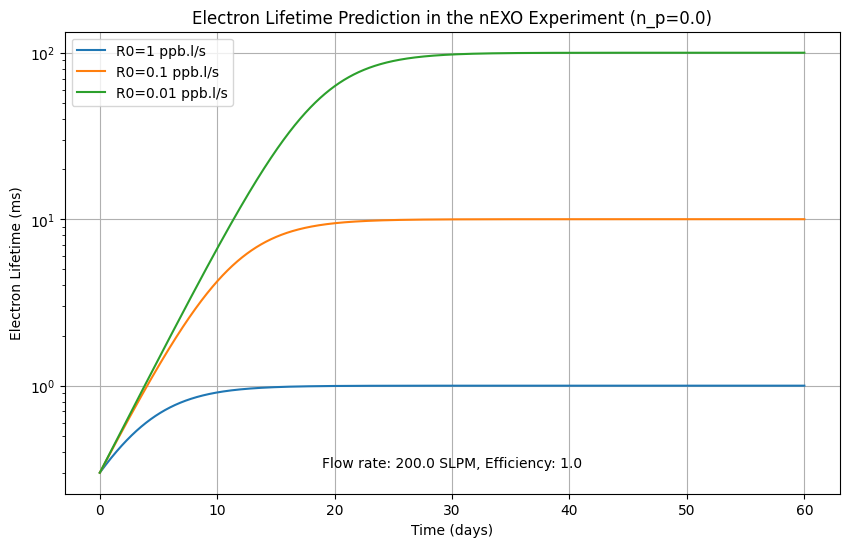

In [26]:
# Keeping N_p constant, but with multiple R0 values
n_p= 0.0  # in ppb, purifier output impurity concentration
R0_values = [1, 0.1, 0.01] # in ppb liter/sec, total out-diffusion rate

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
for R0 in R0_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s')

# Configuring the plot's settings
plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (n_p={n_p})')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

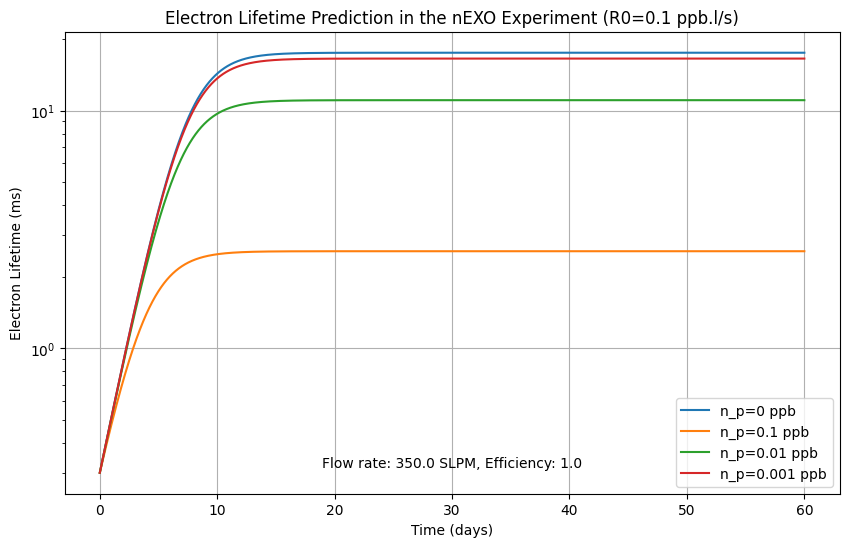

In [29]:
# This time keeping R0 constant, but with multiple n_p values
F = 350/60  # in liter/sec, xenon gas circulation flow rate
R0=0.1 # in ppb liter/sec, total out-diffusion rate
n_p_values = [0, 0.1, 0.01, 0.001] # in ppb, purifier output impurity concentration

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each n_p
for n_p in n_p_values:
    electron_lifetimes = [enf.electron_lifetime(sec, M_nEXO, p_LXe, n0, F, eta, R0, alpha, n_p) for sec in seconds]

    # Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
    plt.plot(seconds / (24*60*60), electron_lifetimes, label=f'n_p={n_p} ppb')

# Configuring the plot's settings
plt.title(f'Electron Lifetime Prediction in the nEXO Experiment (R0={R0} ppb.l/s)')
plt.xlabel('Time (days)')
plt.ylabel('Electron Lifetime (ms)')
plt.yscale('log')
plt.legend()
plt.text(0.5, 0.05, f'Flow rate: {F*60} SLPM, Efficiency: {eta}', ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(True)

plt.show()

## XPM measurement fits

Fits for the measurements made by the Xenon Purity Monitor at SLAC.

### Re-alalyzing XPM Measurement

Data from "control3" (empty XPM) in April (run start 2-10-17). From P.C. Rowson et al., Xenon Purity Monitor at SLAC

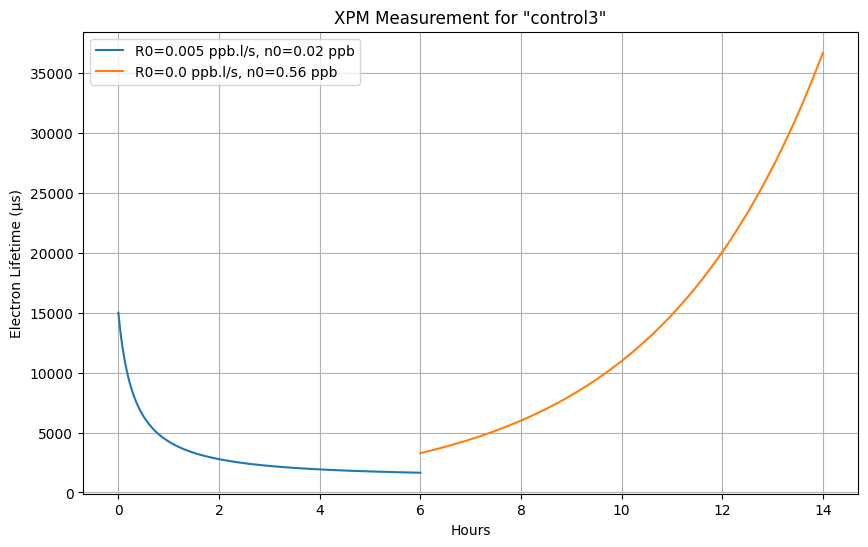

In [14]:
#Assuming
n_p= 0.0  # in ppb, purifier output impurity concentration
alpha = 0.3*1e3  # in μs, EXO-200 value, field dependant factor

#Given constants for first fit
F = 1.4/60  # in liter/sec, xenon gas circulation flow rate
eta = 1.0; eta_error=0.3  # purification efficiency
R0 = 5.0e-3; R0_error=1.0e-3 # in ppb liter/sec, total out-diffusion rate
n0 = 0.02; n0_error=0.02  # in ppb, initial impurity concentration
seconds = np.arange(0, 6*60*60+1)
seconds= np.arange(0, 6*60*60+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

#--------------------------------------------------------------------------------------------------------------------------------

# Given constants for second fit
R0 = 0.0e-4; R0_error=7.4e-4 # in ppb liter/sec, total out-diffusion rate
n0 = 0.56; n0_errors=0.12  # in ppb, initial impurity concentration
seconds = np.arange(6*60*60+1, 14*60*60+1)

# Calculate electron lifetime and plot for each R0
electron_lifetimes = [enf.electron_lifetime(sec, M_XPM, p_LXe, n0, F, eta, R0, alpha) for sec in seconds]
plt.plot(seconds / (60*60), electron_lifetimes, label=f'R0={R0} ppb.l/s, n0={n0} ppb')

# Configuring the plot's settings
plt.title('XPM Measurement for "control3"')
plt.xlabel('Hours')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

### Exemple with Torlon

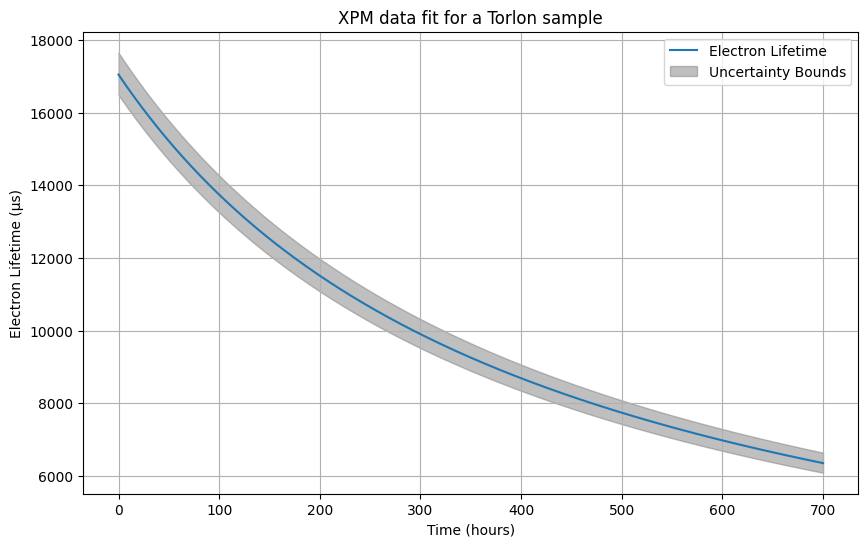

In [7]:
# Constants
n0=0.0176; n0_error=6e-4
R0=3.27e-6; R0_error=0.16e-6
second = np.arange(0, (700*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Torlon sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

### Exemple with Ultem.

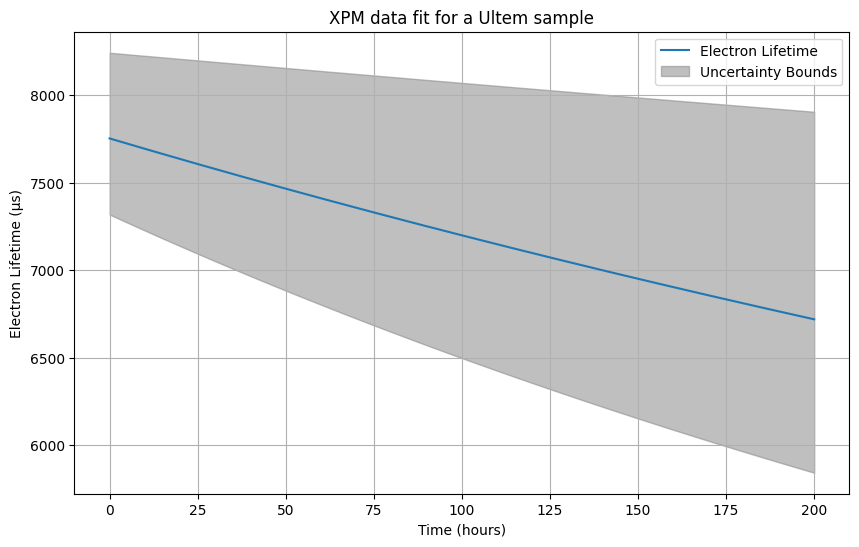

In [8]:
# Constants
n0=0.0387; n0_error=2.3e-3
R0=2.3e-6; R0_error=1.7e-6
second = np.arange(0, (200*60*60)+1)

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate electron lifetime and its bounds, then plot
electron_lifetimes, lower_bounds, upper_bounds = enf.XPM_electron_lifetime_fit(second, C_el, n0, R0, p_LXe, M_XPM, n0_error, R0_error)

# Plotting the main line
plt.plot(second / (60*60), electron_lifetimes, label='Electron Lifetime')
plt.fill_between(second / (60*60), lower_bounds, upper_bounds, color='grey', alpha=0.5, label='Uncertainty Bounds')

# Configuring the plot's settings
plt.title('XPM data fit for a Ultem sample')
plt.xlabel('Time (hours)')
plt.ylabel('Electron Lifetime (μs)')
plt.legend()
plt.grid(True)

plt.show()

## Modelling outgassing of impurities

From Ako Jamil's thesis (section 4.2).

### Desorption from Stainless Steel

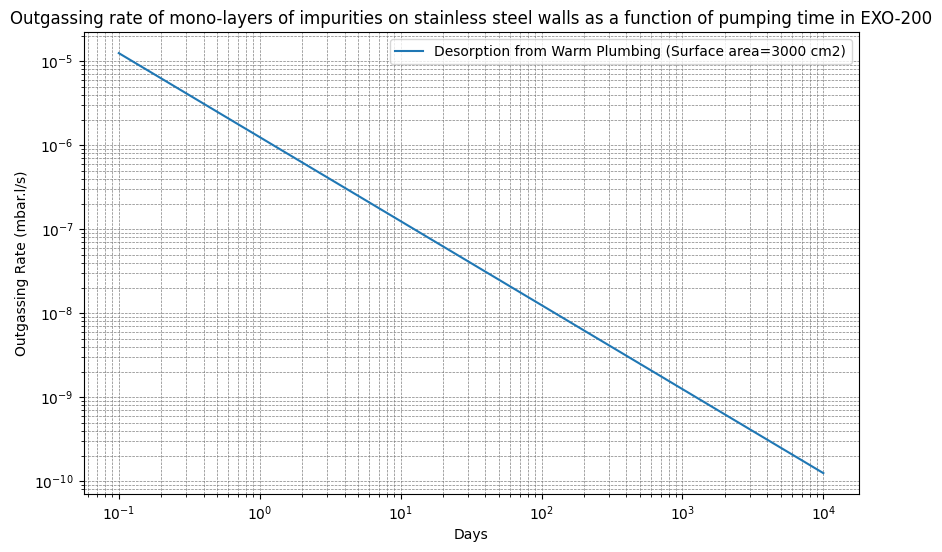

In [15]:
# Constant
tau0=1e-13 # in sec, residence time of an impurity
area=3000 #in cm2, area of the sample
J=1e-8 # in mbar.L.s-1.cm-1, outgassing rate of H2O from an unbaked stainless steel surface that has been pumped on for 1h
t = np.arange(1e-1*24*60*60, (1e4*24*60*60)+1, 60 * 60) # in seconds
t0=1*60*60 # constant value from Ako Jamil's thesis page 89

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate outgassing rate
J_total = J * area * t0/t

# Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
plt.plot(t / (24*60*60), J_total, label=f'Desorption from Warm Plumbing (Surface area={area} cm2)')

# Configuring the plot's settings
plt.title(f'Outgassing rate of mono-layers of impurities on stainless steel walls as a function of pumping time in EXO-200')
plt.xlabel('Days')
plt.ylabel('Outgassing Rate (mbar.l/s)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')

plt.show()

**Different results from ako's, why?? See page 89**

### Outgassing from plastics

/Users/antoine/My Drive/Documents/Thèse/Electronegative impurities/Electronegative_impurities_Simulations/elec_neg_functions.py:147: RuntimeWarning: divide by zero encountered in scalar divide
  J = c0 * np.sqrt(D / t)


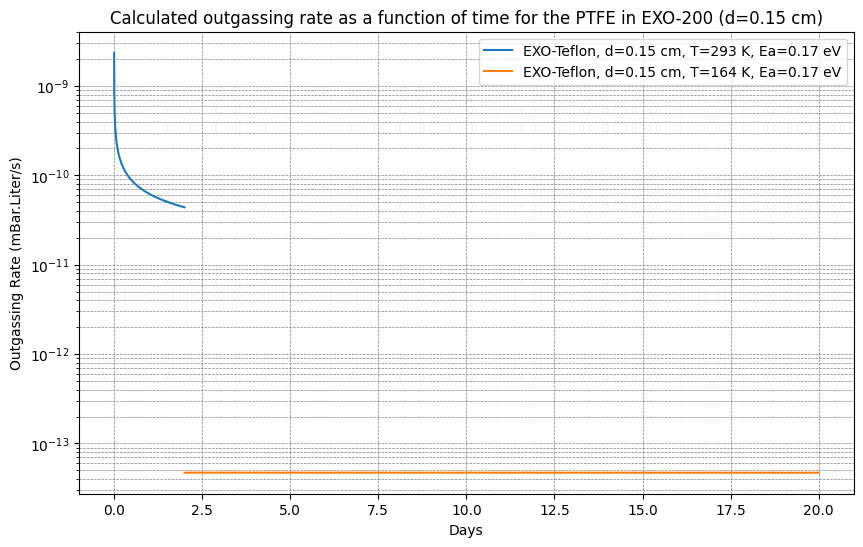

In [10]:
# Constants
t_short = np.arange(0, (2*24*60*60)+1, 60) # in seconds, time array now incremented every hour
t_long = np.arange((2*24*60*60), (20*24*60*60)+1, 60) # in seconds, time array now incremented every hour
c0=943/1e9 # in ppb, initial oxygen concentration in PTFE
D0=31.4/1e8 # in cm2.s-1, Diffusion constant at infinite temperature
Ea=0.17*1.602176634e-19 # in Joules, activation energy
d=0.15 # in cm, thickness of PTFE

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate outgassing rates
outgassing_rate_recirculated = [enf.plastics_outgassing_approximation(c0, D0, Ea, T_room, sec, 'short')*1e3 for sec in t_short]
outgassing_rate_long = [enf.plastics_outgassing_approximation(c0, D0, Ea, T_LXe, sec, d, 'long')*1e3 for sec in t_long]

# Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
plt.plot(t_short / (24*60*60), outgassing_rate_recirculated, label=f'EXO-Teflon, d={d} cm, T={T_room} K, Ea={Ea/1.602176634e-19} eV')
plt.plot(t_long / (24*60*60), outgassing_rate_long, label=f'EXO-Teflon, d={d} cm, T={T_LXe} K, Ea={Ea/1.602176634e-19} eV')

# Configuring the plot's settings
plt.title(f'Calculated outgassing rate as a function of time for the PTFE in EXO-200 (d={d} cm)')
plt.xlabel('Days')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')

plt.show()

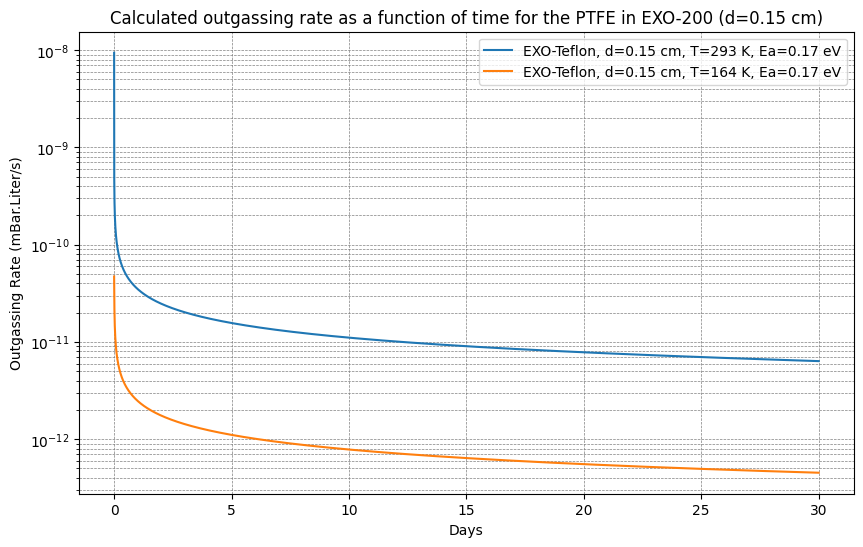

In [11]:
# Constant
t = np.arange(0, (30*24*60*60)+1, 60) # in seconds, time array now incremented every hour

# Prepare a plot with a specified figure size
plt.figure(figsize=(10, 6))

# Calculate outgassing rates
outgassing_rate = [enf.plastics_outgassing(c0, D0, Ea, T_room, d, sec, 1000)*1e3 for sec in t] #1000 iterations is enougth, checked with 10000 is same
outgassing_ratecold = [enf.plastics_outgassing(c0, D0, Ea, T_LXe, d, sec, 1000)*1e3 for sec in t]

# Plotting, while dividing 'seconds' by the number of seconds in a day to convert to days
plt.plot(t / (24*60*60), outgassing_rate, label=f'EXO-Teflon, d={d} cm, T={T_room} K, Ea={Ea/1.602176634e-19} eV')
plt.plot(t / (24*60*60), outgassing_ratecold, label=f'EXO-Teflon, d={d} cm, T={T_LXe} K, Ea={Ea/1.602176634e-19} eV')

# Configuring the plot's settings
plt.title(f'Calculated outgassing rate as a function of time for the PTFE in EXO-200 (d={d} cm)')
plt.xlabel('Days')
plt.ylabel('Outgassing Rate (mBar.Liter/s)')
plt.yscale('log')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth='0.5', color='gray')

plt.show()